<a href="https://colab.research.google.com/github/TEhyeok/AIFFEL_Exploration/blob/main/Legend_of_Poketmon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이 포켓몬은  전설의 포켓몬일까?

---
아래의 다양한 특징(feature)들을 갖기고 전설의 포켓몬을 맞추는 ai 모델을 만들어  보자.


## Dataset

- \# : 각 포켓몬의 ID
- Name: 각 포켓몬의 이름
- Type 1: 각 포켓몬에는 유형이 있으며, 이는 공격에 대한 약점/저항을 결정합니다.
- Type 2: 일부 포켓몬은 이중 유형이며 2개를 가지고 있습니다.
- Total: 이 이후에 나오는 모든 통계의 합계, 포켓몬이 얼마나 강한지에 대한 일반적인 가이드
- HP: 체력 또는 건강은 포켓몬이 기절하기 전에 견딜 수 있는 피해량을 정의합니다.
- Attack: 일반 공격의 기본 수식(예: 스크래치, 펀치)
- Defense: 일반 공격에 대한 기본 피해 저항
- SP Atk: 특수 공격, 특수 공격의 기본 수식(예: 화염 폭발, 버블 빔)
- SP Def: 특수 공격에 대한 기본 피해 저항력
- Speed: 매 라운드마다 먼저 공격하는 포켓몬을 결정합니다.

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 탐색적 데이터 분석(Exploratory Data Analysis, 이하 EDA)

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
Poketmon = pd.read_csv('/content/drive/MyDrive/Poketmon/Pokemon.csv')
Poketmon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [258]:
# copy 본 생성
pokemon = Poketmon

In [259]:
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [260]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [261]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
731,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
732,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
733,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


In [262]:
# 결측값 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [263]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### 실제 컬럼
- \# : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 \#값을 가진다. int
- Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str
- Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
-Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
- Total : 전체 6가지 스탯의 총합. int
- HP : 포켓몬의 체력. int
- Attack : 물리 공격력. (scratch, punch 등) int
- Defense : 물리 공격에 대한 방어력. int
- Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int
- Sp. Def : 특수 공격에 대한 방어력. int
- Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
- Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
- Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

In [264]:
# # : ID number 총 몇 종류있는지 확인
# "#" 데이터셋을 집합(set)으로 만들고 길이 확인 -> 중복 없는 개수 확인 가능
len(set(pokemon["#"]))

721

In [265]:
# 같은 값을 가지는 # 찾아보기
pokemon[pokemon["#"] == 6]
# #6의 포켓몬은 Charizard, CharizardMega Charizard X, CharizardMega Charizard Y 세 개로 나뉩니다.
# 기본 포켓몬인 Charizard(리자몽)로부터 시작해서 진화한 Mega Charizard가 있고, X, Y는 버전을 나타내는 것으로 보입니다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [266]:
# Name의 총 개수(중복 없는)
len(set(pokemon["Name"]))
# 이름은 데이터셋 전체 값과 같이 800개, 모든 이름은 unique함을 알 수 있습니다.

800

In [267]:
# Type 1 & Type 2: 포켓몬의 속성
# 각 포켓몬의 속성 무작위로 확인
# #6은 type 2 -> Flying / #8는 Type 2 -> NaN
# 따라서 Type 2 결측치는 NaN으로 표기 되어있다.
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [268]:
# poketmon type 개수
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [269]:
# type 1과 type 2의 차집합
# set()로 차집합 만들기
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [270]:
# type 1의 종류
# pokemon 데이터셋에서 Type 1이 중복된 값을 허용하지 않도록 set형태로 만듦
# 다시 list로 감싸서 list형태로 바인딩
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Dark', 'Ground', 'Fighting', 'Water', 'Rock', 'Normal', 'Ghost', 'Fairy', 'Ice', 'Grass', 'Steel', 'Dragon', 'Flying', 'Poison', 'Bug', 'Fire', 'Electric', 'Psychic']


In [271]:
# type 2 결측치 개수
pokemon["Type 2"].isnull().sum()

386

### Type 별 분포도

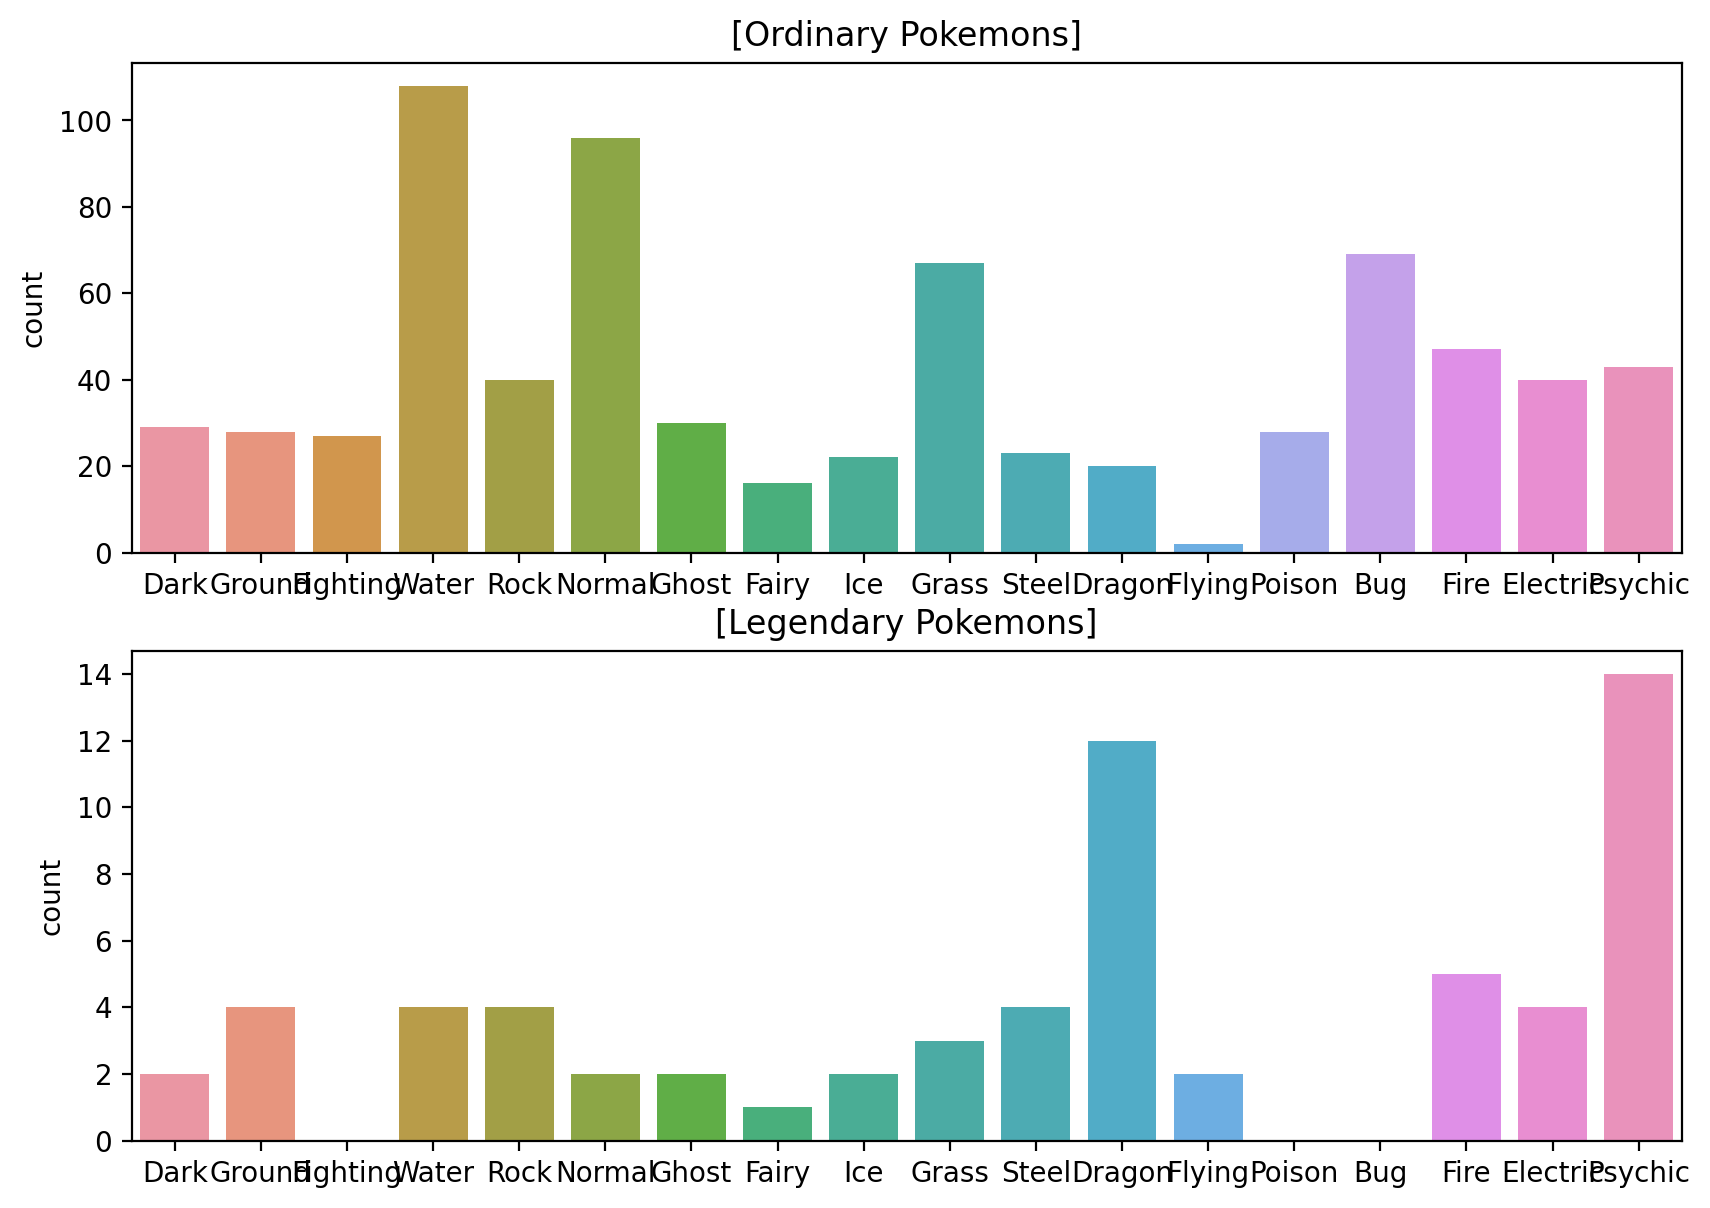

In [272]:
# type 1 / ordinary, legendary
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [273]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
# pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


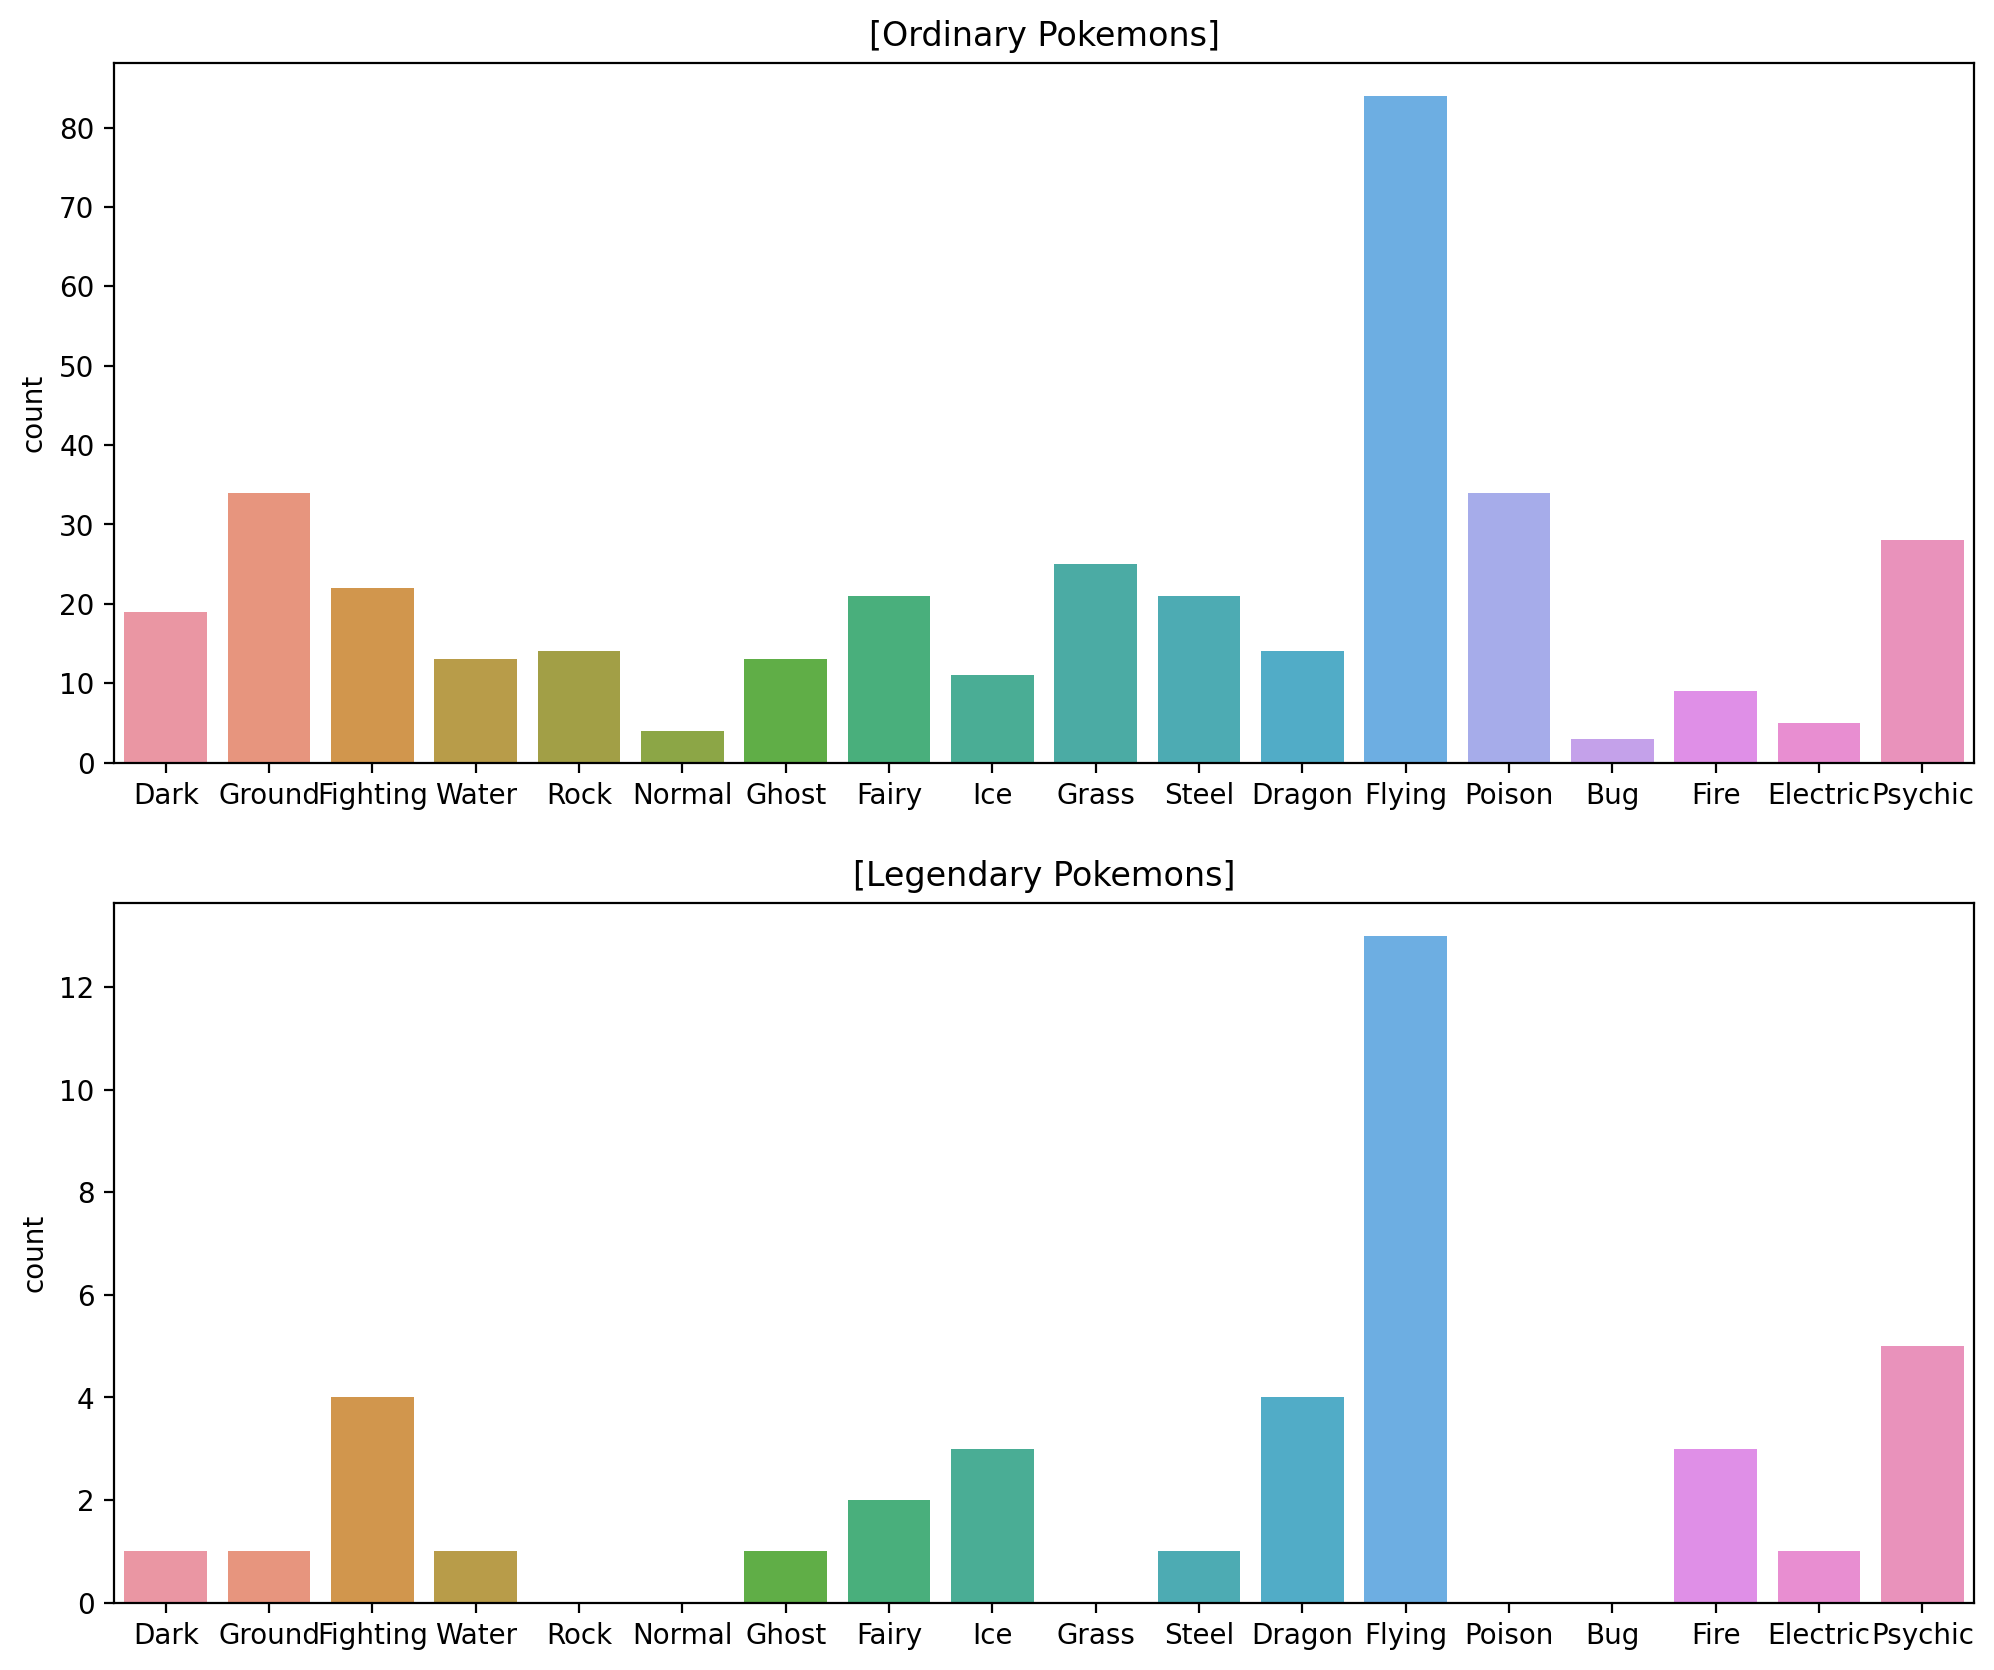

In [274]:
# Q. 아래 코드의 빈칸을 채워주세요.
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [275]:
# type 2 피봇테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [276]:
# 모든 스탯의 종류를 'stats'라는 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [277]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [278]:
gen = pokemon[(pokemon['Total'] >= 580) & (pokemon['Legendary'] == False)]
gen

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False


### 1. 580 미만은 전설의 포켓몬 없음

### 2. 580 이상인데 메가 진화이면 일반일 확률이 있음

In [279]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.
# `stats`가 열 이름의 리스트라고 가정
sum_stats = pokemon[stats].sum(axis=1)
same = pokemon[pokemon['Total'] == sum_stats]
same

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### Total값에 따른 분포 plot

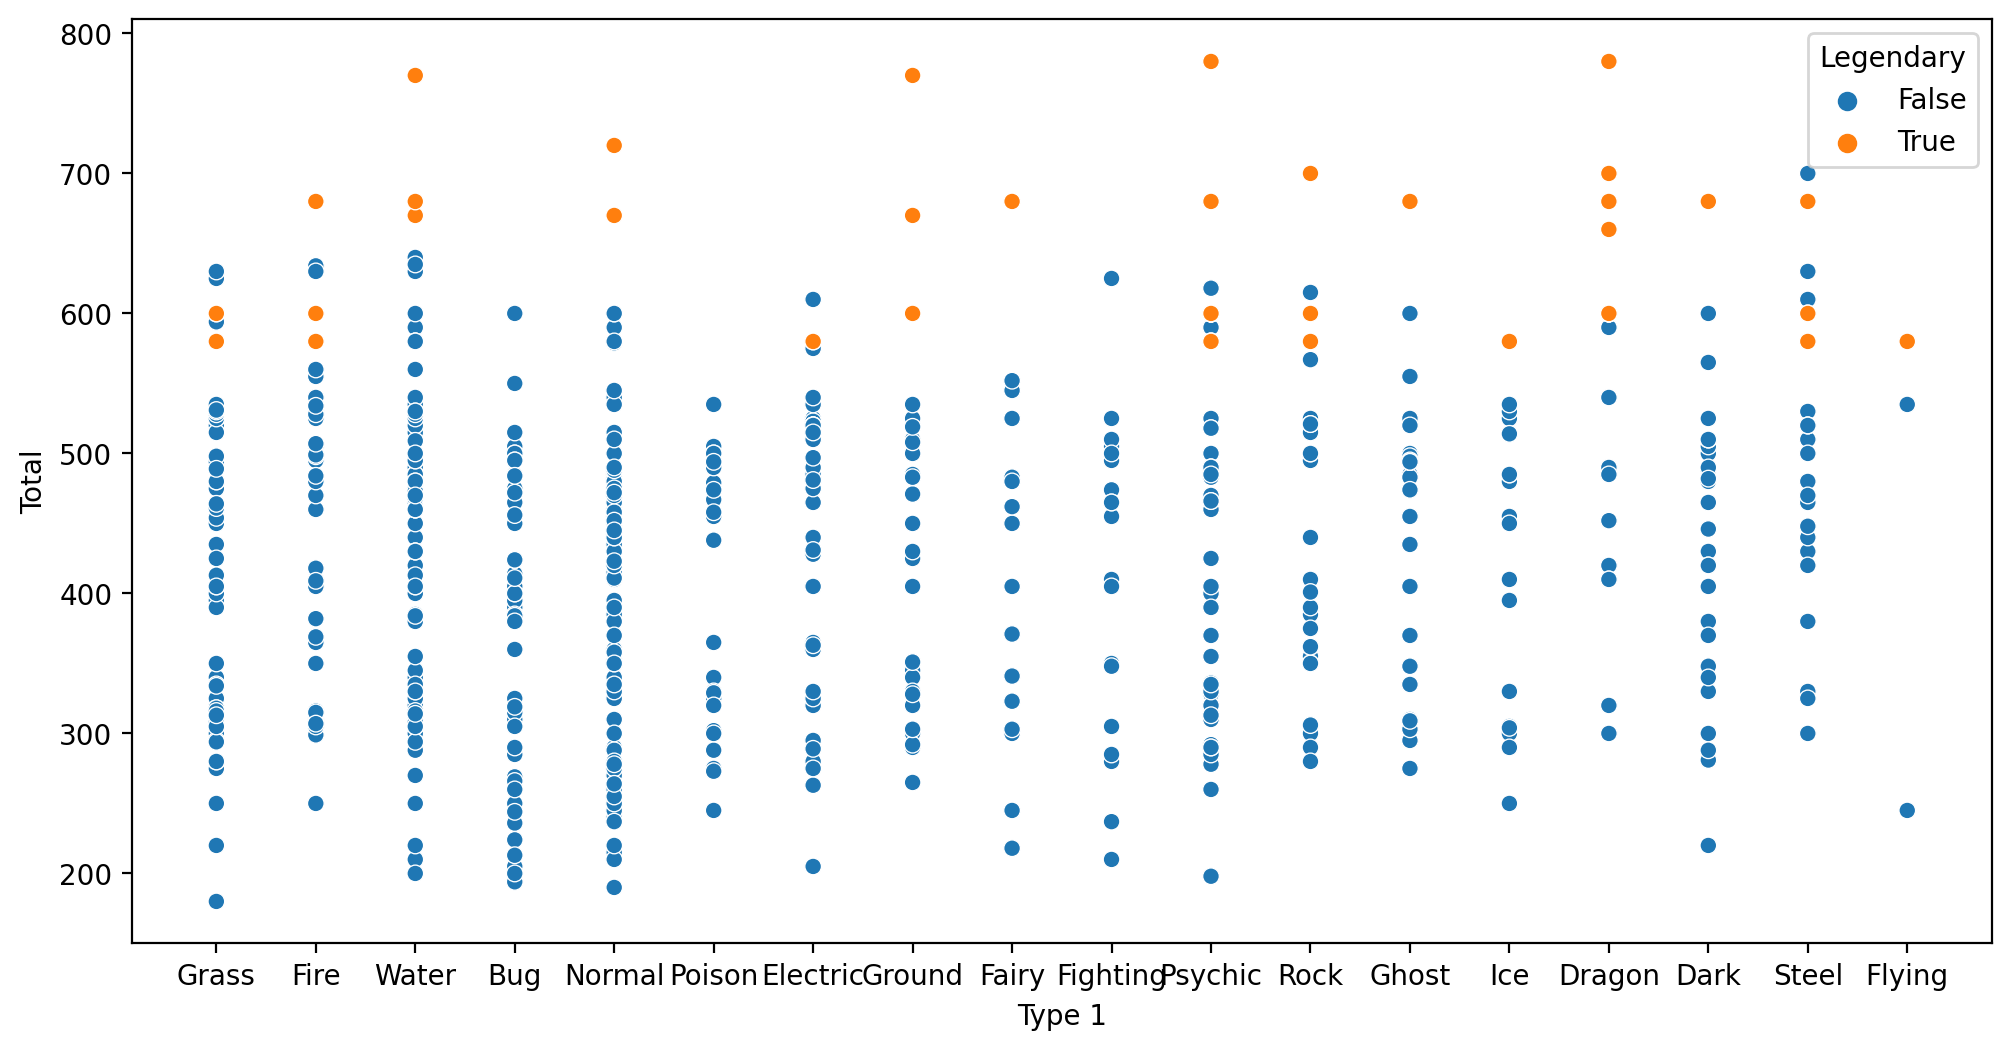

In [280]:
flg, ax = plt.subplots()
flg.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# 단일 그래프를 그릴때는 ax=ax 쓰지 않아도 된다.
sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary", ax=ax)
plt.show()

Text(0.5, 1.0, 'Speed vs Title')

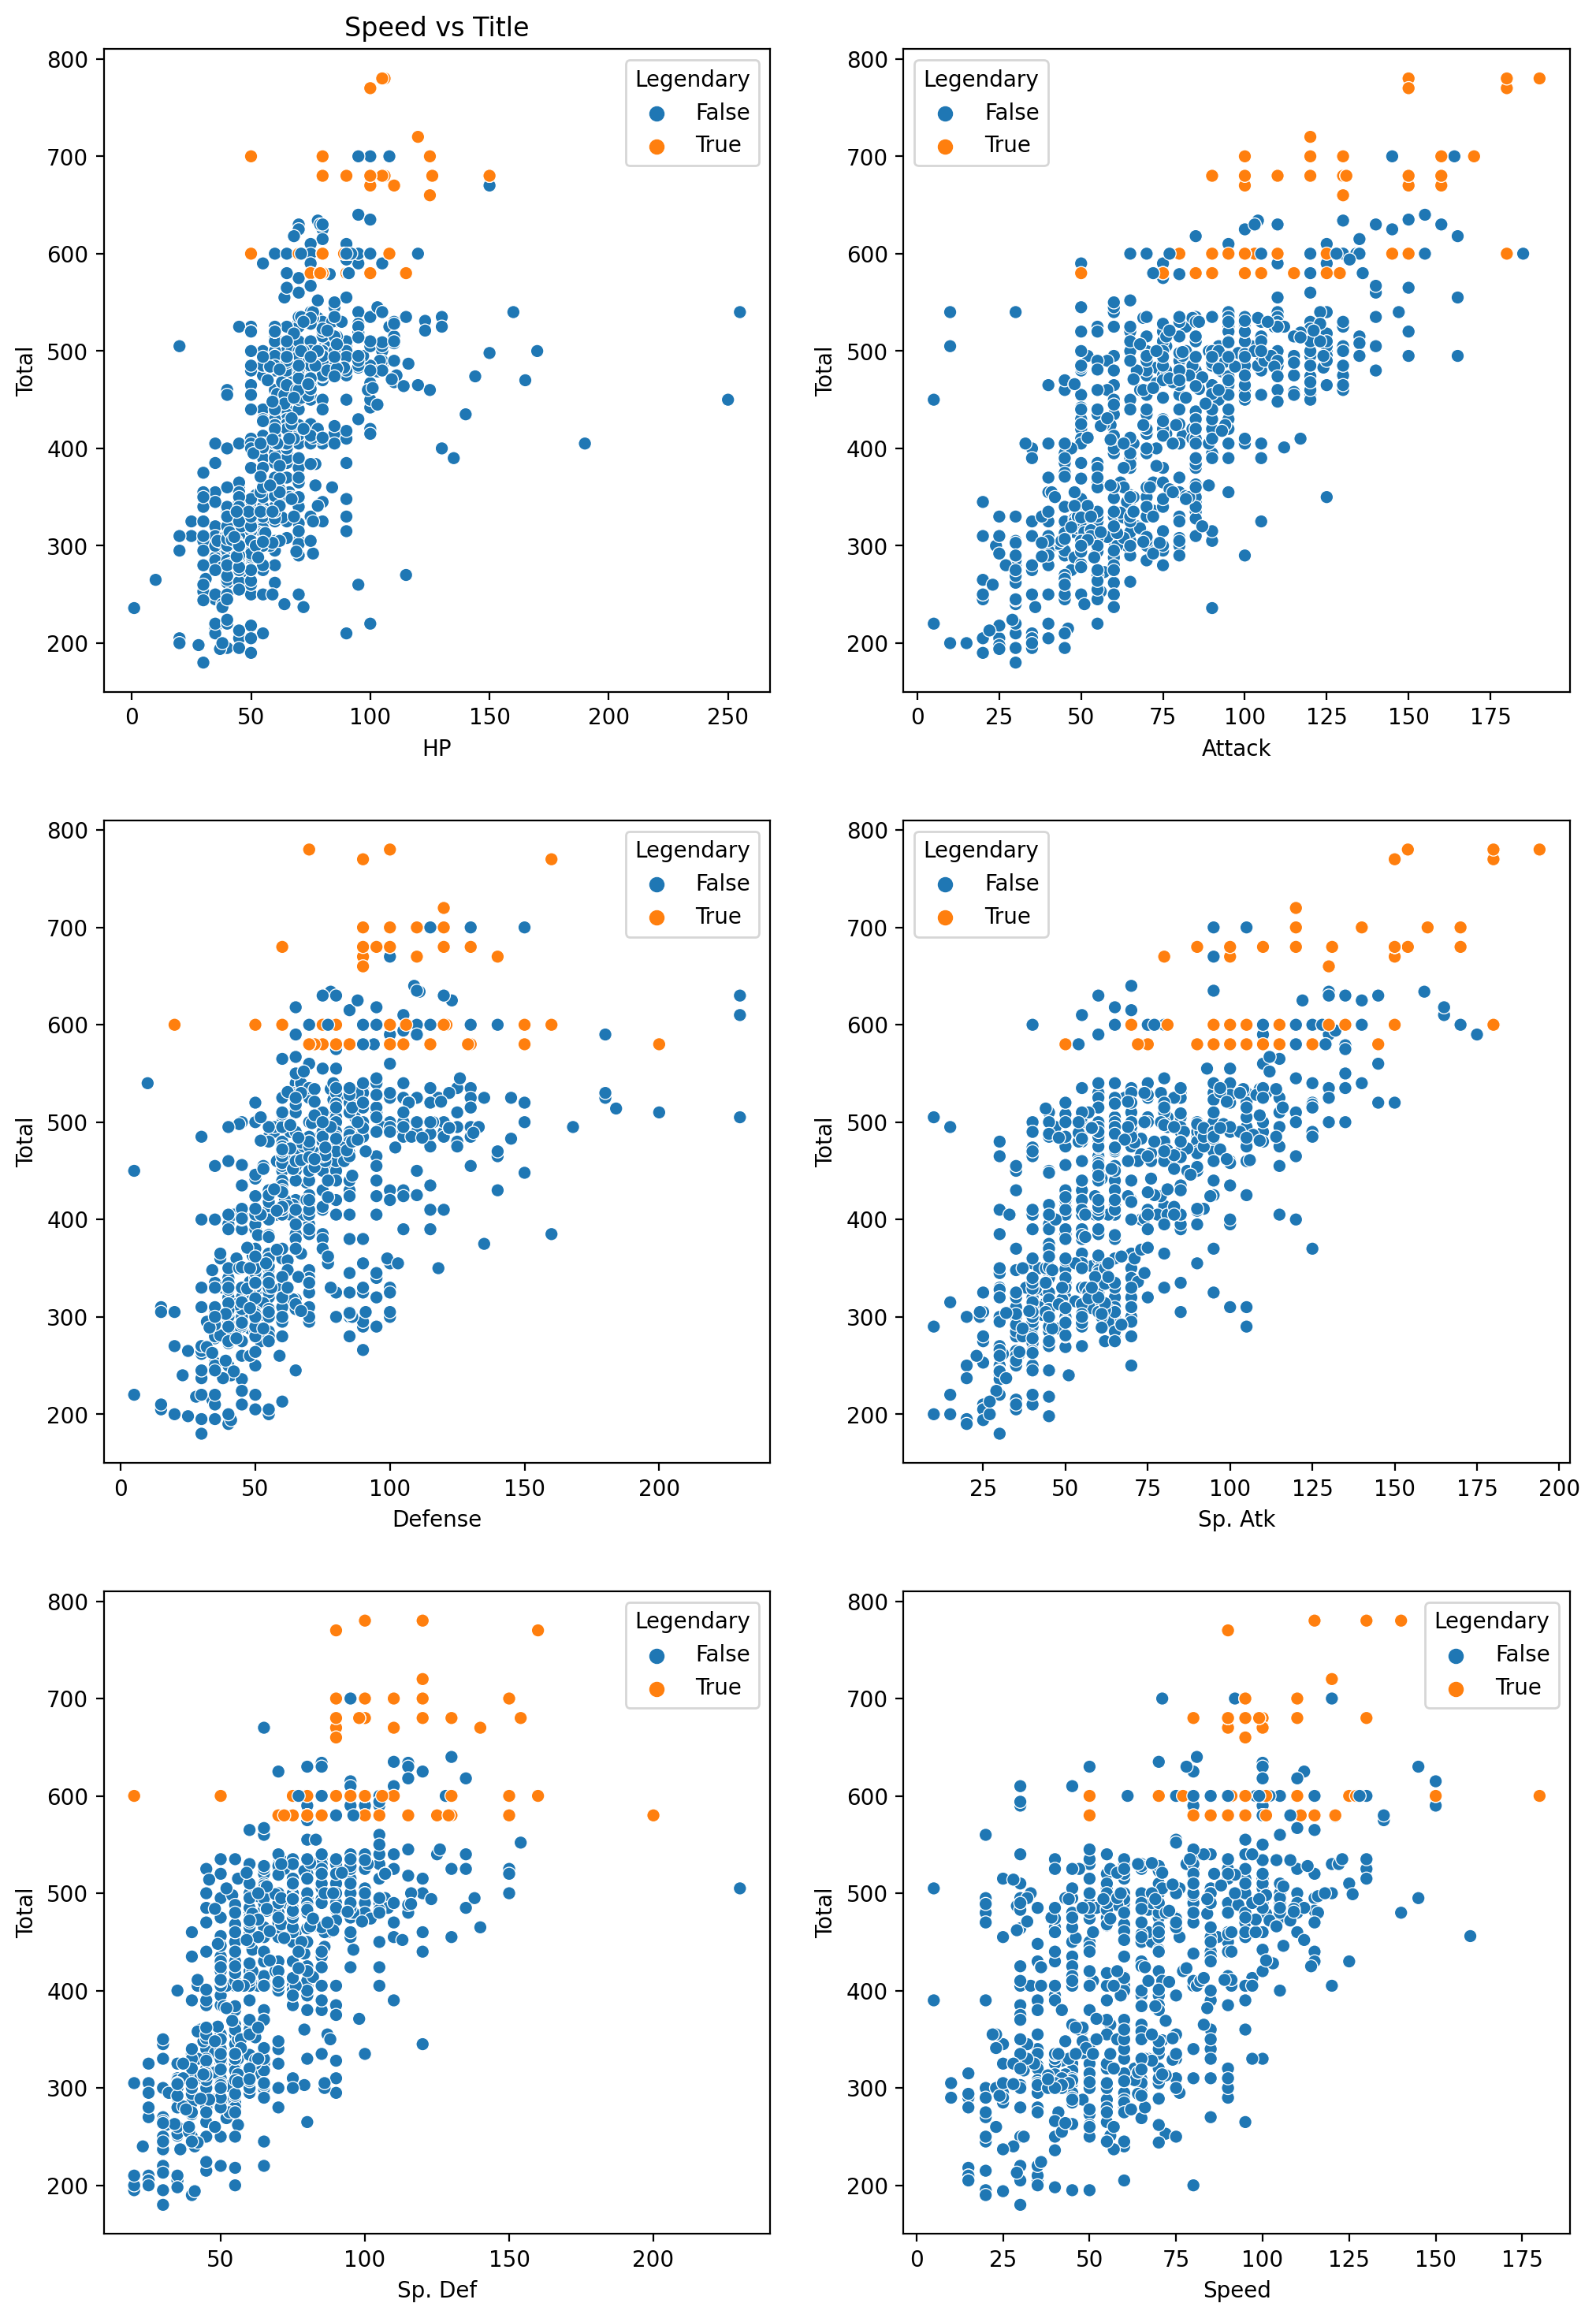

In [281]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3,ncols=2)
figure.set_size_inches(12, 18) # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
ax1.set_title("HP vs Title")

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
ax1.set_title("Attack vs Title")

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
ax1.set_title("Defense vs Title")

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
ax1.set_title("Sp. Atk vs Title")

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
ax1.set_title("Sp. Def vs Title")

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
ax1.set_title("Speed vs Title")

# plt.show()

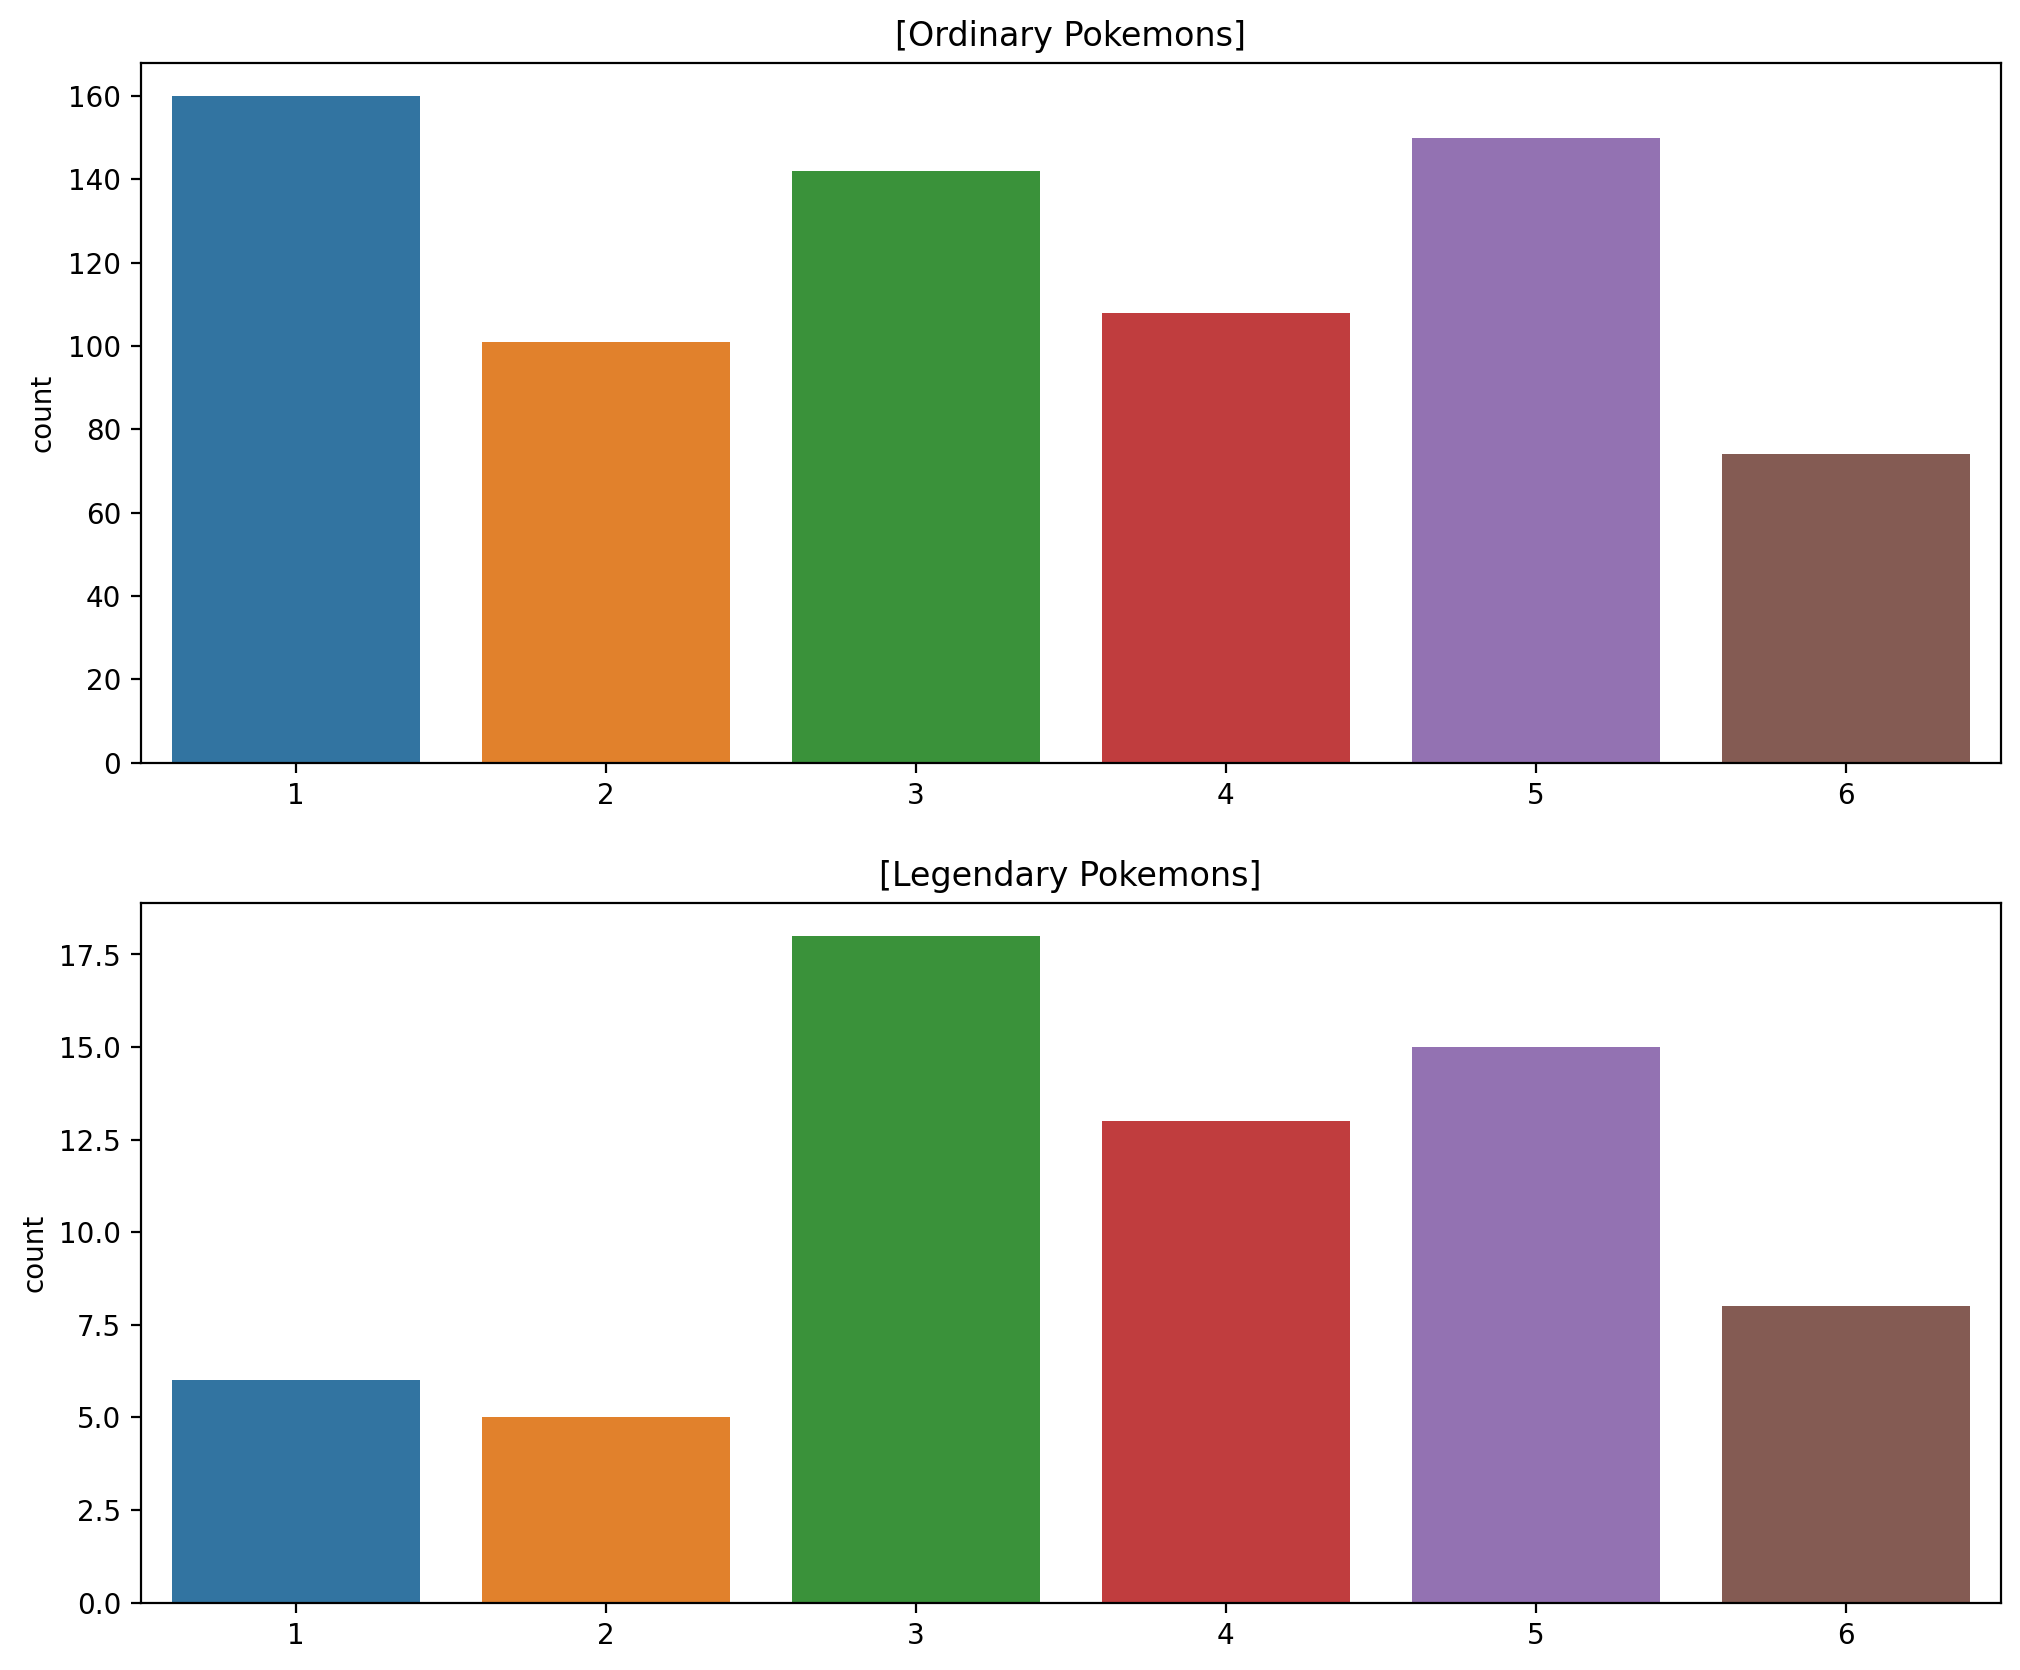

In [282]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

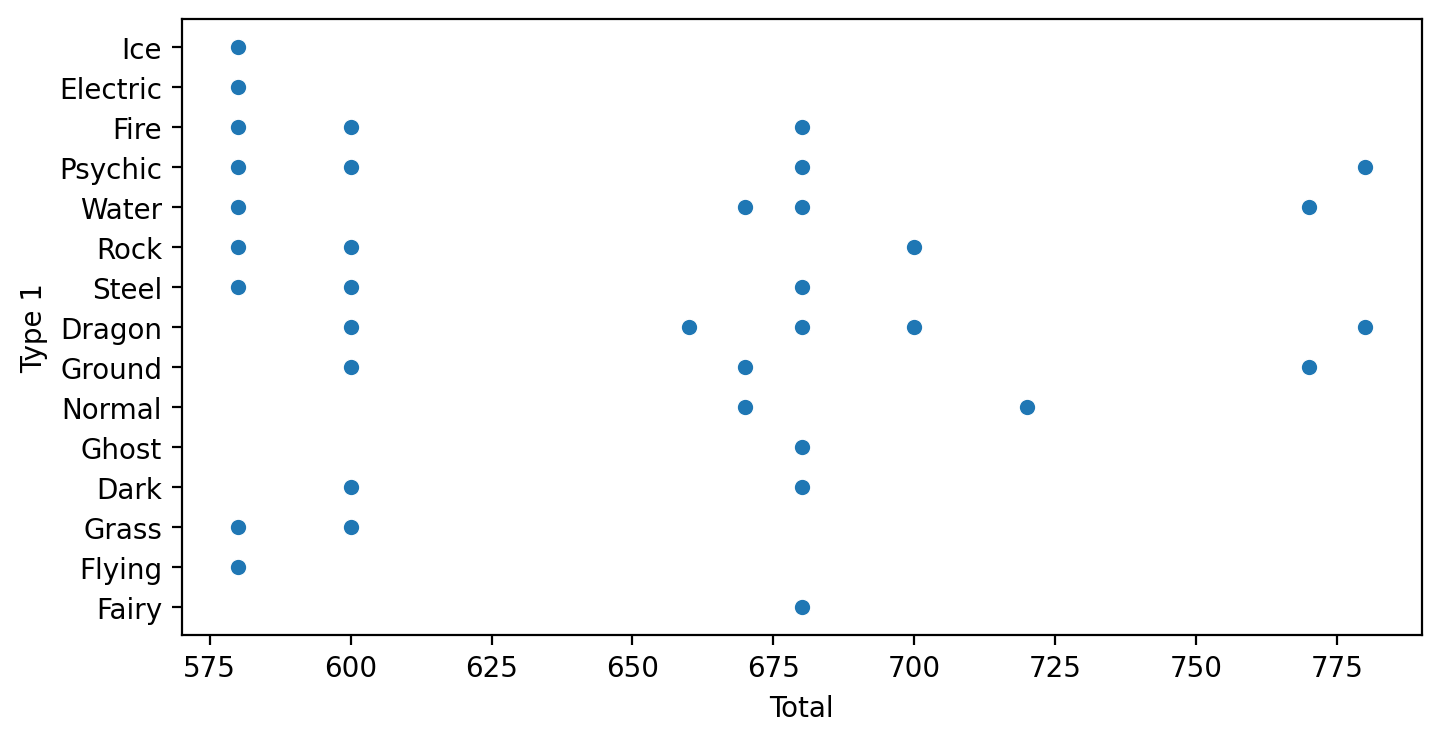

In [283]:
# 전설 포켓몬 Total 값
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

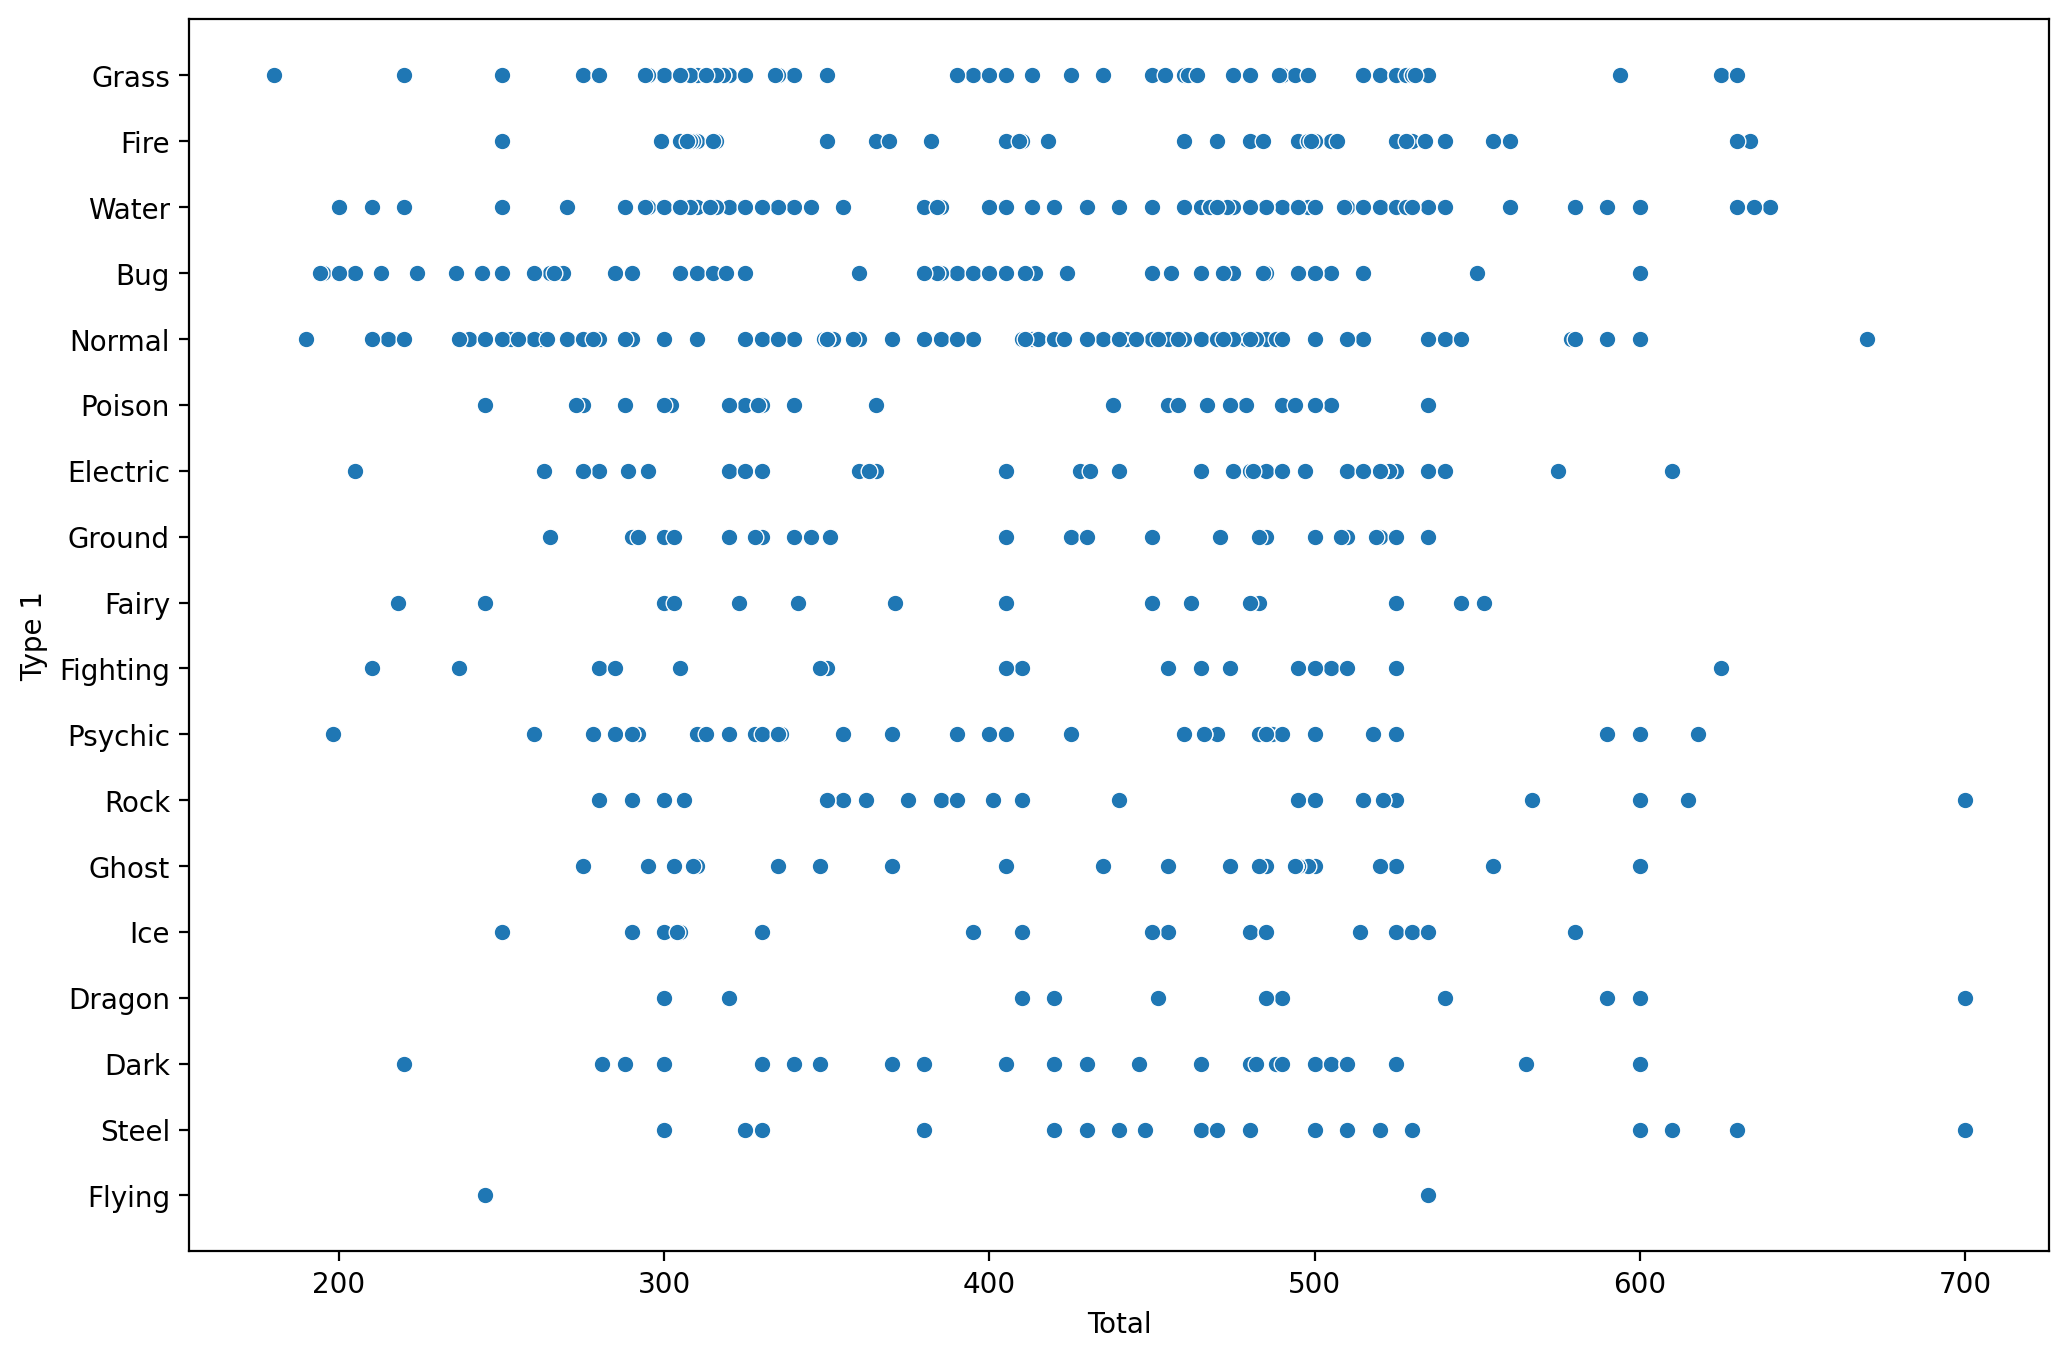

In [284]:
# 일반 포켓몬 Total 값
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

In [285]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


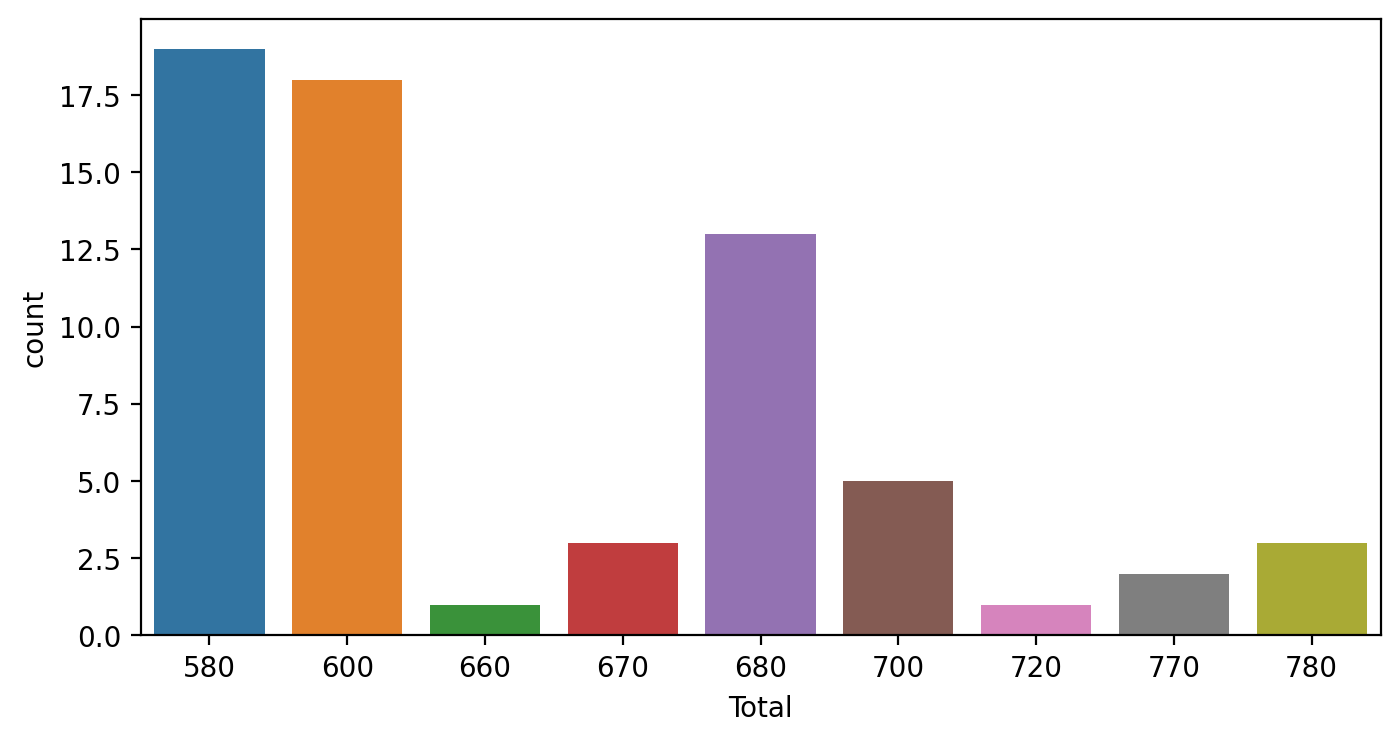

In [286]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [287]:
round(65 / 9, 2)
# 7.22 마리만 같은 total 스탯값을 가진다.

7.22

In [288]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [289]:
round(735 / 195, 2)

3.77

In [290]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [291]:
# 이름에 forme가 들어가는 여러 가지 전설의 포켓몬이 있는 경우
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [292]:
# legendary와 ordinary 각각에 모두 "name_count"라는 이름의 길이를 나타내는 컬럼을 만든다
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [293]:
# Q. ordinary 포켓몬의 데이터에도 'name_count' 값을 추가해줍시다.
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


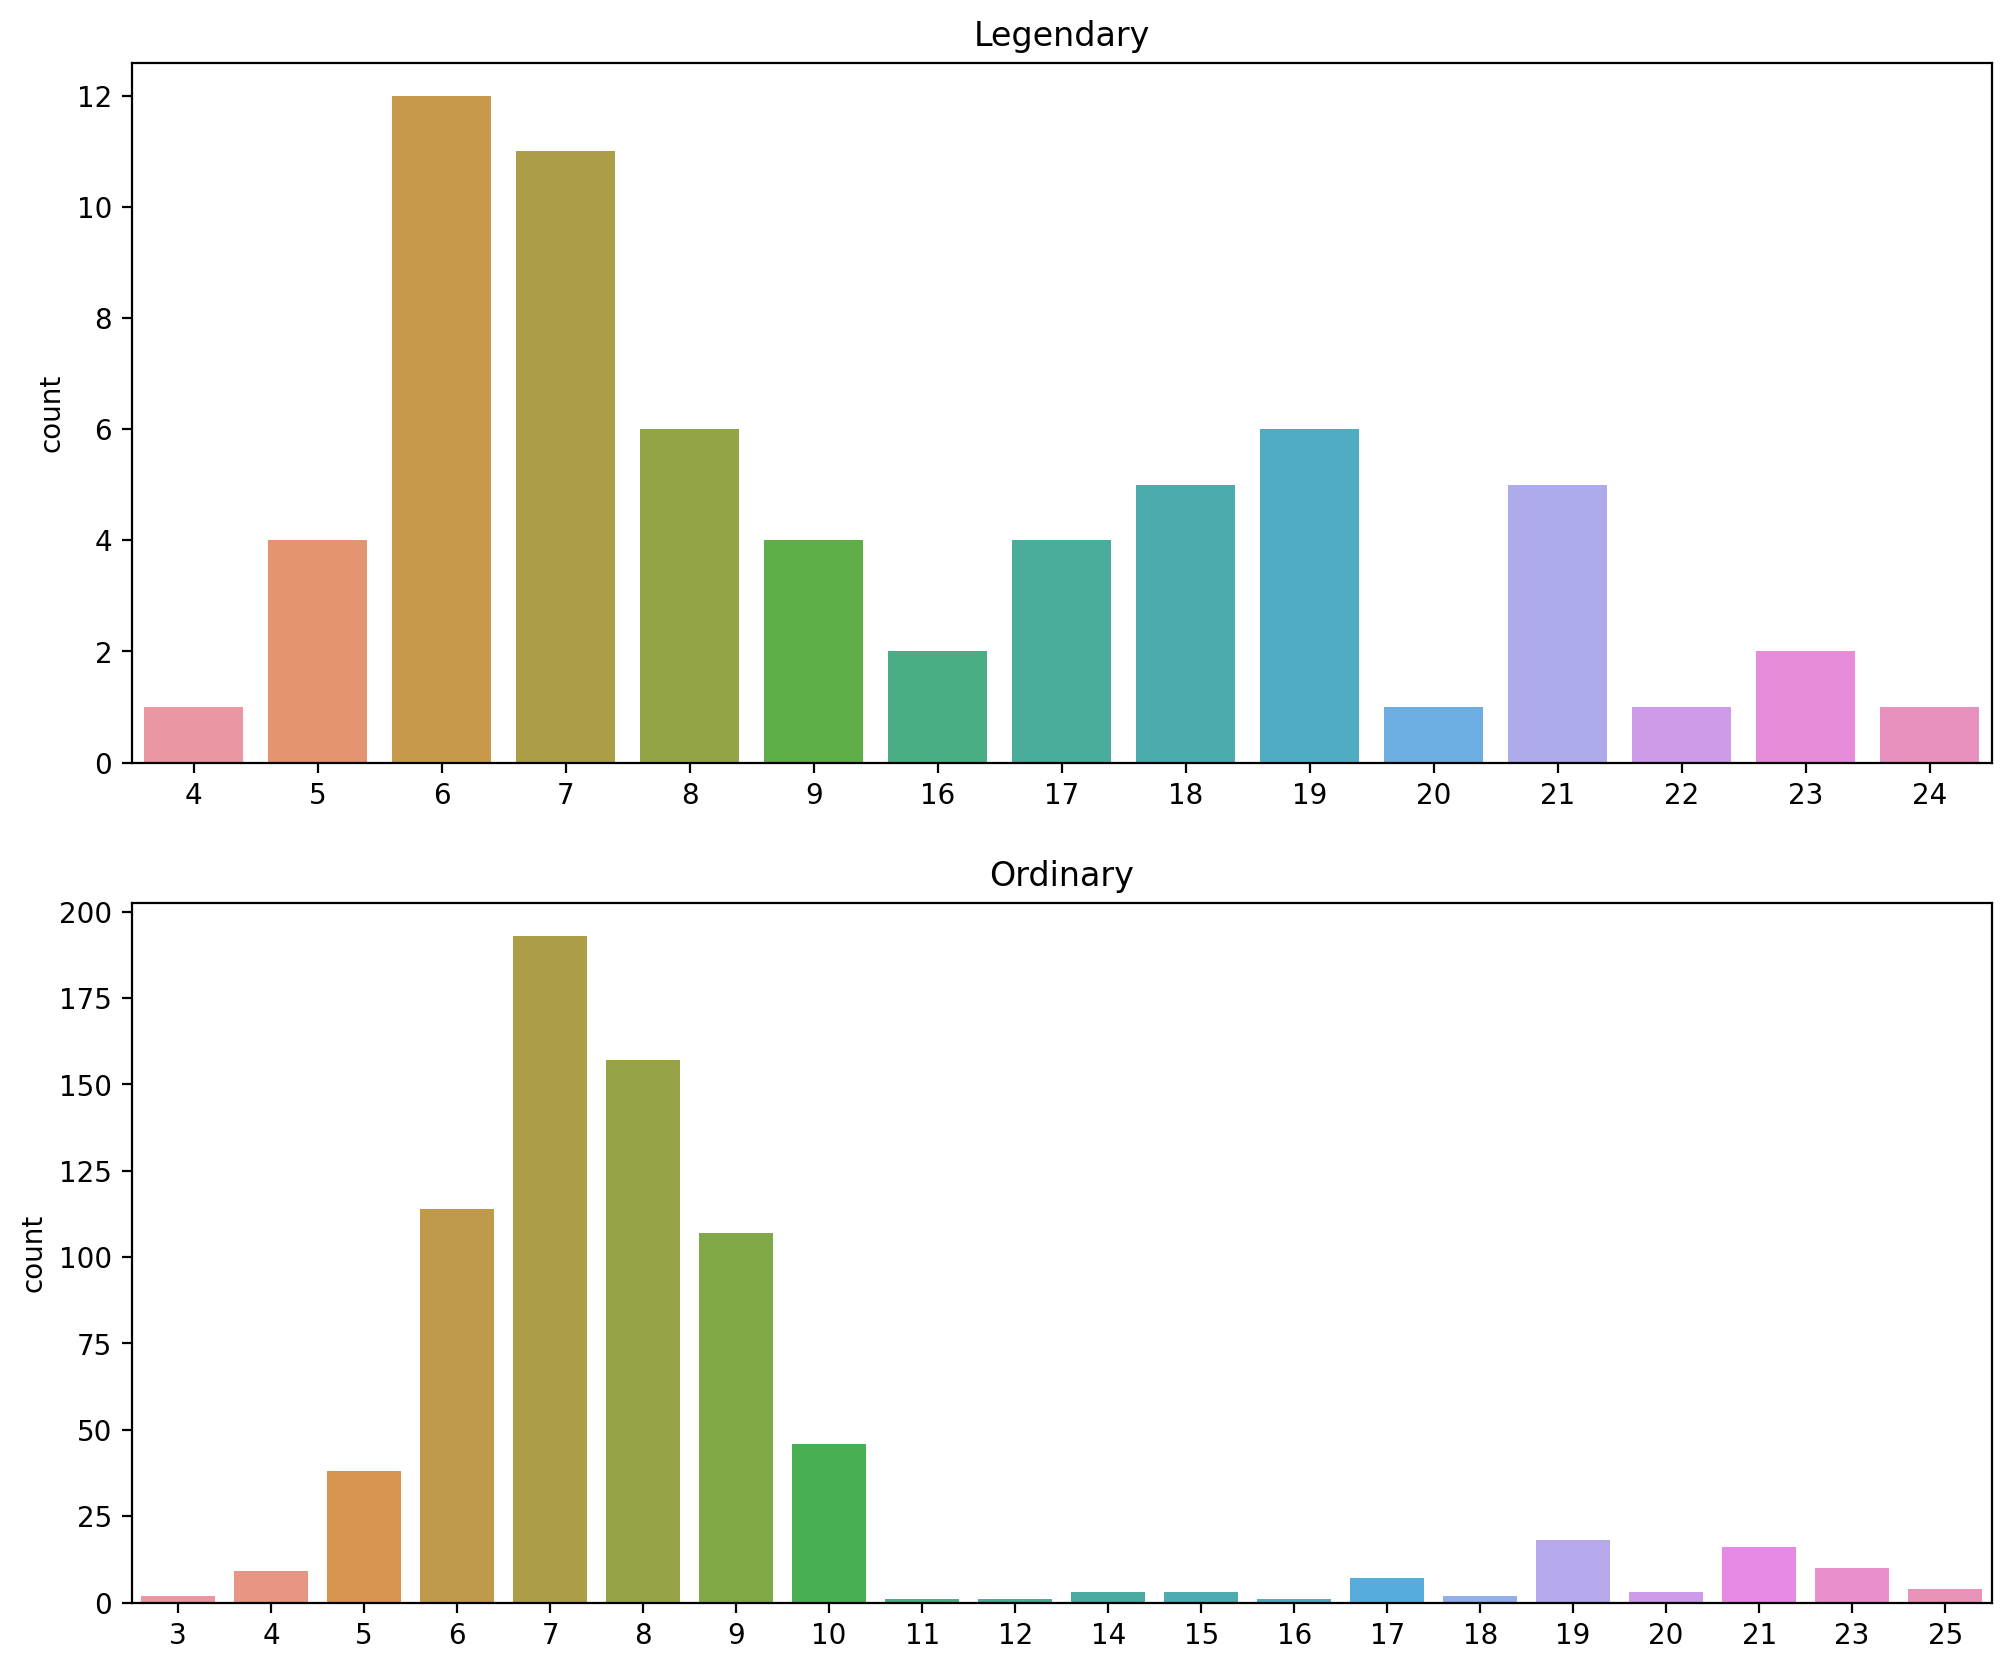

In [294]:
# name_count 특징
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()
#  전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주

In [295]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [296]:
# Q. 일반 포켓몬의 이름이 10글자 이상일 확률을 구해보세요.
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


## 데이터 전처리

In [297]:
# 전체 데이터가 있는 pokemon 데이터 프레임에 name_count 컬럼을 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [298]:
# 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [299]:
# 이름에 알파벳이 아닌 문자가 들어간 경우 전처리
# '알파벳이 아닌 문자'를 포함하는 경우를 처리
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [300]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [301]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [302]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [303]:
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [304]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(8, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [305]:
import re

In [306]:
name = "CharizardMega Charizard X"

In [307]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [308]:
temp = name_split[0]
temp

'CharizardMega'

In [309]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [310]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [311]:
# Q. 다음 코드의 빈칸을 채워주세요.
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

In [312]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [313]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [314]:
from collections import Counter

In [315]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [316]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [317]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [318]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [319]:
print(types)

['Dark', 'Ground', 'Fighting', 'Water', 'Rock', 'Normal', 'Ghost', 'Fairy', 'Ice', 'Grass', 'Steel', 'Dragon', 'Flying', 'Poison', 'Bug', 'Fire', 'Electric', 'Psychic']


In [320]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Dark,Ground,Fighting,Water,Rock,Normal,Ghost,Fairy,Ice,Grass,Steel,Dragon,Flying,Poison,Bug,Fire,Electric,Psychic
0,Grass,Poison,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [321]:
print(Poketmon.shape)
Poketmon.head()

(800, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [322]:
Poketmon = Poketmon.drop(['name_count', 'long_name', 'Name_nospace', 'name_isalpha'], axis=1)
Poketmon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [323]:
Poketmon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 모델링

In [324]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [325]:
target = 'Legendary'

In [326]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = Poketmon[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [327]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = Poketmon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### 의사결정트리

In [328]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [329]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [330]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [331]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [332]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [333]:
len(legendary)

65

In [334]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [335]:
print(len(pokemon.columns))
print(pokemon.columns)
pokemon

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Dark', 'Ground', 'Fighting', 'Water', 'Rock', 'Normal', 'Ghost',
       'Fairy', 'Ice', 'Grass', 'Steel', 'Dragon', 'Flying', 'Poison', 'Bug',
       'Fire', 'Electric', 'Psychic'],
      dtype='object')


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Ice,Grass,Steel,Dragon,Flying,Poison,Bug,Fire,Electric,Psychic
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,True,False,False,False,True,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,True,False,False,False,True,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,True,False,False,False,True,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,True,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,False,False,False,False,False,False,False,False,False,False
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,False,False,False,False,False,False,False,False,False,False
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,False,False,False,False,False,False,False,False,False,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,False,False,False,False,False,False,False,False,False,True


In [336]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [337]:
target = "Legendary"
target

'Legendary'

In [338]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [339]:
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [341]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [342]:
# Q. train 데이터로 decision tree 모델을 학습시키고
# test 데이터로 모델의 예측 값을 얻어봅시다!
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [343]:
# Q. confusion matrix를 확인해보세요.
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [344]:
# Q. classification report도 확인해봅시다!
# 현재 의사결정트리를 통해 True 클래스
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



### XGBOOST


In [345]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb

# 이 부분은 당신의 데이터에 따라 조정이 필요합니다.
# X와 y를 정의하거나 불러오는 코드를 여기에 추가하세요.

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# XGBoost 모델 생성 및 훈련
model = xgb.XGBClassifier(random_state=25)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 혼동 행렬 출력
print(confusion_matrix(y_test, y_pred))

# 분류 리포트 출력
print(classification_report(y_test, y_pred))

(640, 38) (640,)
(160, 38) (160,)
[[145   2]
 [  2  11]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       147
        True       0.85      0.85      0.85        13

    accuracy                           0.97       160
   macro avg       0.92      0.92      0.92       160
weighted avg       0.97      0.97      0.97       160



In [346]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# XGBoost 분류기 설정
model = xgb.XGBClassifier()

# 튜닝할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 3, 5]  # 불균형 데이터셋을 다루기 위한 파라미터
}

# Grid Search로 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터로 훈련된 모델을 가져옴
best_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:")
print(grid_search.best_params_)

# 테스트 데이터에서의 성능 확인
y_pred = best_model.predict(X_test)

# 성능 메트릭 출력
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Hyperparameters:
{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 3}
[[139   8]
 [  0  13]]
              precision    recall  f1-score   support

       False       1.00      0.95      0.97       147
        True       0.62      1.00      0.76        13

    accuracy                           0.95       160
   macro avg       0.81      0.97      0.87       160
weighted avg       0.97      0.95      0.96       160



### 랜덤포레스트

In [347]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 이 부분은 당신의 데이터에 따라 조정이 필요합니다.
# X와 y를 정의하거나 불러오는 코드를 여기에 추가하세요.

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestClassifier(random_state=25)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 혼동 행렬 출력
print(confusion_matrix(y_test, y_pred))

# 분류 리포트 출력
print(classification_report(y_test, y_pred))


(640, 38) (640,)
(160, 38) (160,)
[[143   4]
 [  3  10]]
              precision    recall  f1-score   support

       False       0.98      0.97      0.98       147
        True       0.71      0.77      0.74        13

    accuracy                           0.96       160
   macro avg       0.85      0.87      0.86       160
weighted avg       0.96      0.96      0.96       160



In [348]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# 랜덤 포레스트 분류기 설정
model = RandomForestClassifier(random_state=25)

# 튜닝할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']  # 클래스 불균형을 다루기 위한 옵션
}

# Grid Search로 최적의 하이퍼파라미터 찾기 (재현율과 정밀도의 조화평균 F1-score를 기준으로)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터로 훈련된 모델을 가져옴
best_model = grid_search.best_estimator_

# 테스트 데이터에서의 성능 확인
y_pred = best_model.predict(X_test)

# 성능 메트릭 출력
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[140   7]
 [  1  12]]
              precision    recall  f1-score   support

       False       0.99      0.95      0.97       147
        True       0.63      0.92      0.75        13

    accuracy                           0.95       160
   macro avg       0.81      0.94      0.86       160
weighted avg       0.96      0.95      0.95       160



## 결론

features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

- Total 값
- 6가지 Status
- 이름의 길이 (10 이상)
- 특정 이름의 중복('Forme', 'Mega', Mewtow', ...)
- Type(Poison, Ground, Flying, Normal...)

해당 features들의 상관관계를 EDA 및 데이터 전처리를 통해 알아냄

상황에 따라 다양한 모델을 선택할수 있음

### [의사결정트리]

    [[141,   6],
    [  1,  12]]
              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
    macro avg       0.83      0.94      0.87       160
    weighted avg       0.97      0.96      0.96       160



True 클래스 recall(정확도) = tp / (fn + tp) = 92%


### [랜덤포레스트]

    [[140   7]
    [  1  12]]
              precision    recall  f1-score   support

       False       0.99      0.95      0.97       147
        True       0.63      0.92      0.75        13

    accuracy                           0.95       160
    macro avg       0.81      0.94      0.86       160
    weighted avg       0.96      0.95      0.95       160

True 클래스 recall(정확도) = tp / (fn + tp) = 92%

### [Xgboost]

    [[139   8]
    [  0  13]]
              precision    recall  f1-score   support

       False       1.00      0.95      0.97       147
        True       0.62      1.00      0.76        13

    accuracy                           0.95       160
    macro avg       0.81      0.97      0.87       160
    weighted avg       0.97      0.95      0.96       160

True 클래스 recall(정확도) = tp / (fn + tp) = 100%

